## Problem Statement
Predicting the reach of Instagram posts is a critical task for businesses that rely heavily on social media customers. In such a competitive landscape, it is essential to understand how the Instagram algorithm functions. By gaining insight into the algorithm, businesses can optimize their posts to maximize their reach and engagement.People's Instagram posts and stories are determined by a combination of their behavior and the type of content they interact with and engage in. When Instagram's algorithm detects positive signals from these features in a post, it increases the post's reach among its audience. 

Now, let's explore how to use Machine Learning to implement the Instagram algorithm in this project.

## Data preparation
Based on how the Instagram algorithm works,I figured out that when a user has more followers, then the post is more likely to get more likes and engagement to reach more audience.

So we need to identify a linear relationship in the data and build a machine learning algorithm based on the relationship we find in the data to implement the Instagram algorithm.

For this task, I will be using a dataset with around 100 rows and 6 features containing information on usernames, post captions, followers, hashtags, time since posted, and likes. So I’m going to train a machine learning model to predict the likes of an item.The dataset is from kaggle and you can get it here:https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach

## IMporting necessary libraries


In [32]:
# making Some essential imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re

## Loading the Dataset
So we will start by loading the dataset into our workspace.

In [34]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/filename/instagram_reach.csv")

In [35]:
data[0:10]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


There is no null values in our dataset and each column has 100 entries apart from caption column which has 94 entries.

Looking at the data set lets try to do the following:

1.) Plotting word clouds for Captions and hashTags.

2.) developing a relationship between followers and likes.

3.) Time posted and Likes

Now let’s import some other Python libraries and prepare a function to examine the word cloud to understand the maximum type of words used in Instagram captions and hashtags:

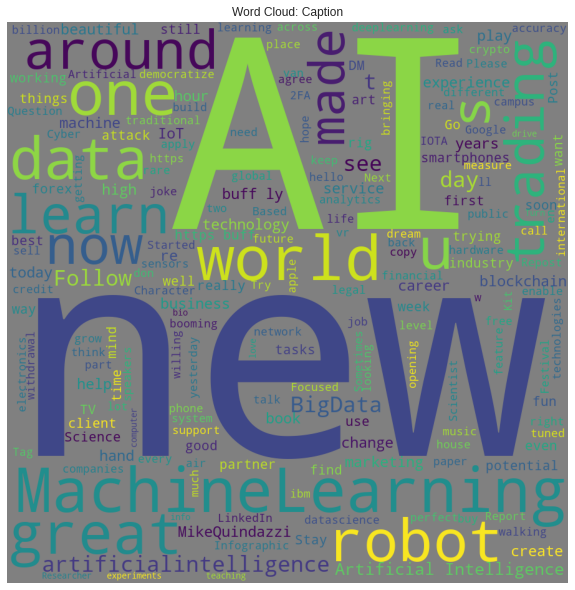

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

def WordCloudPlotter(dfColumn):
    colData = data[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 900, height = 900,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show()
    
WordCloudPlotter('Caption')

This Word Cloud indicates the following:

1.) This data sets is collected from data sceince enthusiasts.

2.) It is emphasizing on the need of AI-ML.

3.) Fields of applications are being talked about

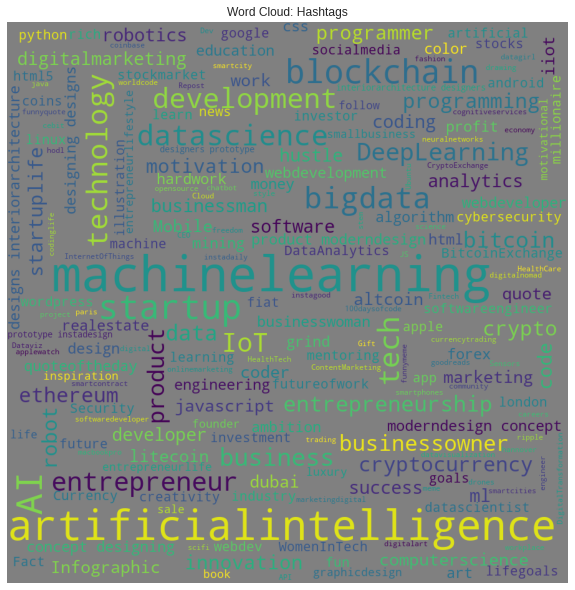

In [39]:
WordCloudPlotter('Hashtags')

Now let’s understand the number of likes we get based on the number of followers we have and the time elapsed since our post:

In [40]:
# removing hours and typecasting to int
data['Time since posted'] = data['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [42]:
# Plotting Likes relationship with
# Followers and Hours since posted
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sb.regplot(data = data, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

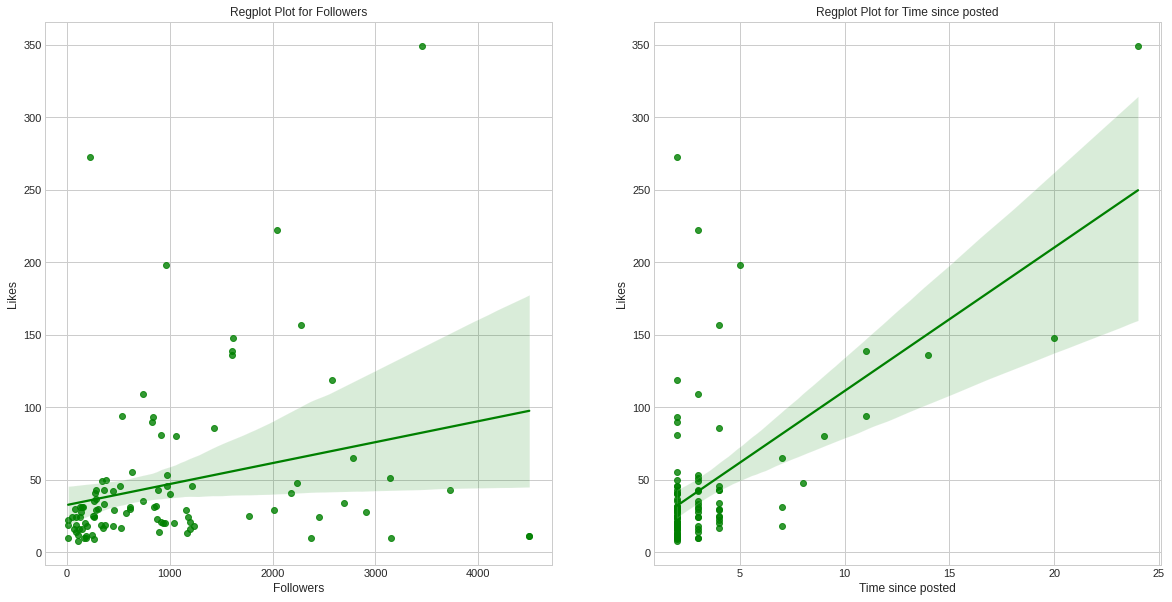

In [43]:
PlotDataGiveConclusion2(['Followers', 'Time since posted'])

Now I’m going to train a simple model to predict the target value which is “likes” with the combination of followers and time since post:

## Predictive Modelling 

In [47]:
# lets us now develope a prediction model
# in the given data set we can have 2 features
# namely followers and time Posted and our 
# target be number of likes.

# Note since this data set pretains to data science community
# converting hashtags into features,I belive would not be 
# that great of an idea

# gathering features

featureVector = np.array(data[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(data['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))


Max value of target is 349.0


In [48]:
#diving targets by max values
targets = targets/maxValLikes

In [49]:
# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [50]:
# for sake of conviniece 
# lets choose our model as 
# Gradeint Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

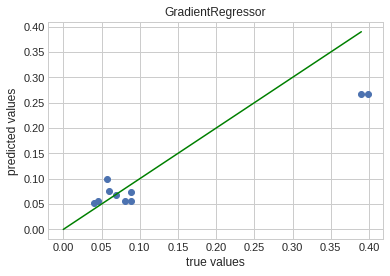

In [51]:
# doing Some Benchmarks
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

From Benchmarks this seems the model though not perfect but we can use it test our algorithm doing  some Predictive modelling on the following cases:

Case 1.) You have 100 followers and time passes by one hour for 24 hours

case 2.) You have 100 followers and you gain 100 follower every hour for 24 hours

In [52]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

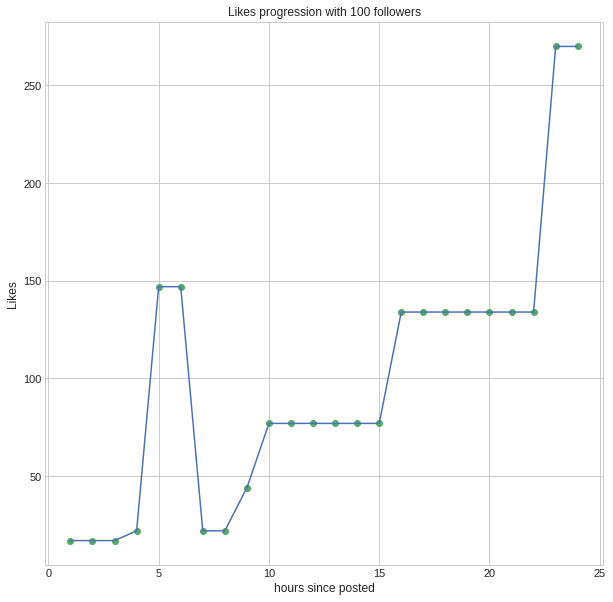

In [53]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

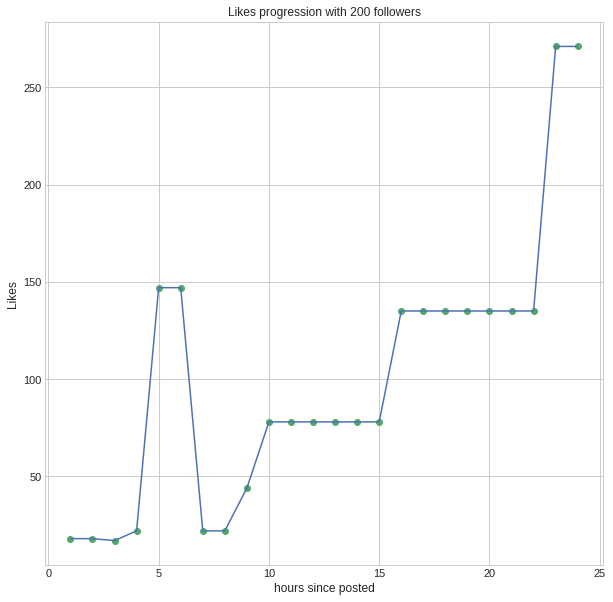

In [54]:
## let us now try out with 200 followers
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

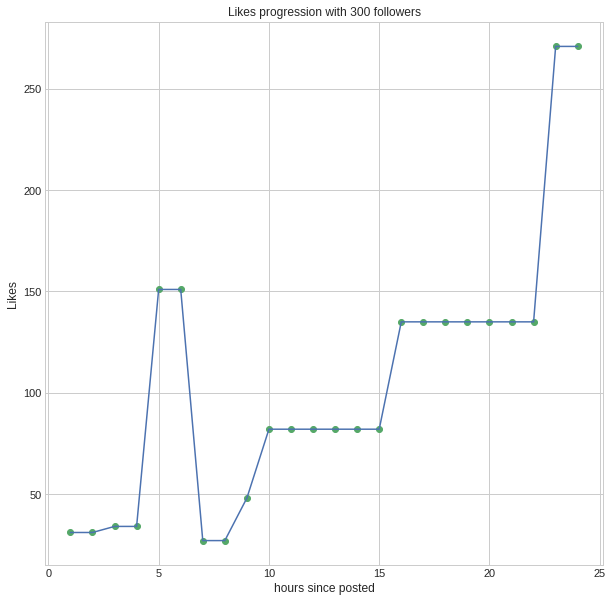

In [55]:
## let tripple the Number of Followers
PredictionsWithConstantFollowers(gbr, 300, stdSc, maxValLikes)

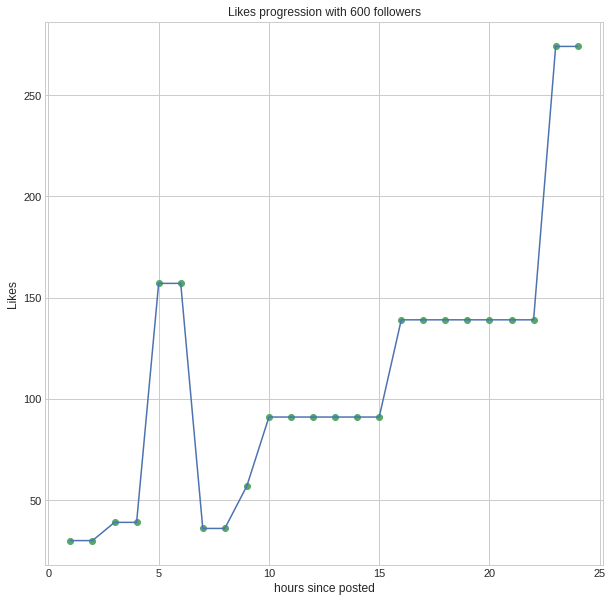

In [56]:
## let 6x the Number of Followers
PredictionsWithConstantFollowers(gbr, 600, stdSc, maxValLikes)

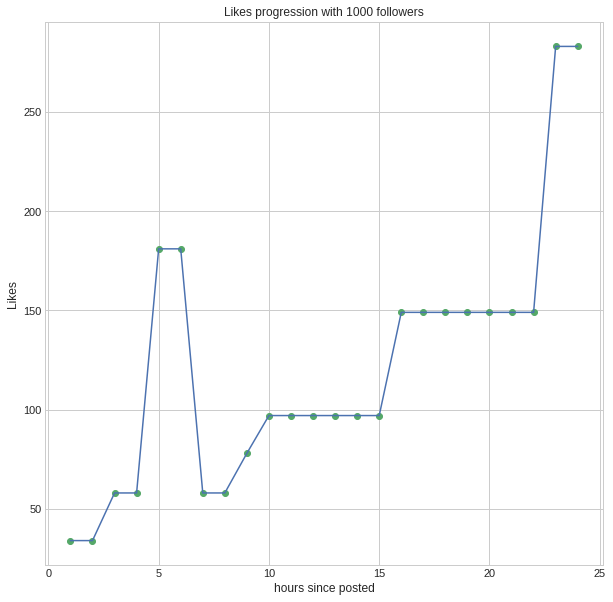

In [57]:
## let 10x the Number of Followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

Based on the predictions above, we can observe one thing: if you have a higher number of subscribers, your post is more likely to get more likes in attendance for life. But the maximum likes will not increase more than 20 times the number of followers only contributes to an increase of about 20% in likes.

In [58]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

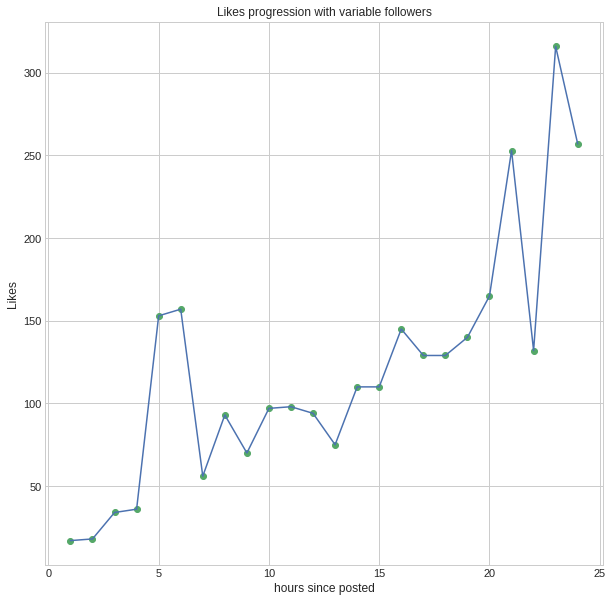

In [59]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)

## Conclusion
If the predictions of our model are accurate and scenario 2 materializes, then posts similar to this one could see rapid growth, although personally, I don't think that will be the case.